# Imports

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data

In [2]:
df = pd.read_csv("data/airbnbDataset.csv")

In [3]:
df = pd.get_dummies(df, columns=['City', 'Day', 'Room Type'], prefix=['City', 'Day', 'Room_Type'])
print(df)

            Price  Shared Room  Private Room  Person Capacity  Superhost  \
0      194.033698        False          True              2.0      False   
1      344.245776        False          True              4.0      False   
2      264.101422        False          True              2.0      False   
3      433.529398        False          True              4.0      False   
4      485.552926        False          True              2.0       True   
...           ...          ...           ...              ...        ...   
41709  715.938574        False         False              6.0      False   
41710  304.793960        False         False              2.0      False   
41711  637.168969        False         False              2.0      False   
41712  301.054157        False          True              2.0      False   
41713  133.230489        False          True              4.0       True   

       Multiple Rooms  Business  Cleanliness Rating  Guest Satisfaction  \
0           

# Feature Selection

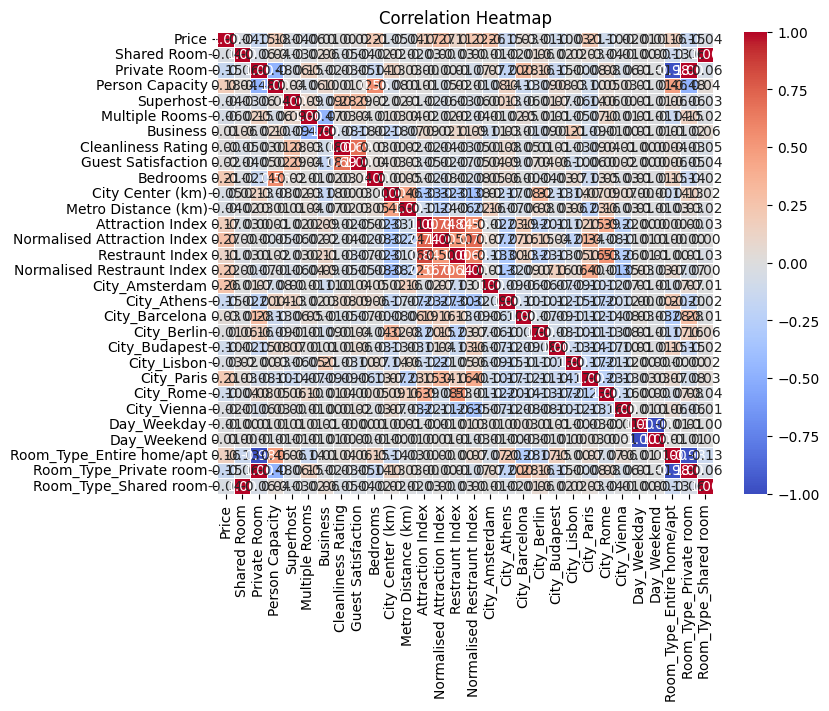

In [4]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Set a correlation threshold
threshold = 0.8

# Select upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation above the threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop the identified features
df_filtered = df.drop(to_drop, axis=1)

# Print the selected features
print("Selected Features:")
print(df_filtered)

# Print the number of columns dropped
num_columns_dropped = len(to_drop)
print(f"\nNumber of Columns Dropped: {num_columns_dropped}")

Selected Features:
            Price  Shared Room  Private Room  Person Capacity  Superhost  \
0      194.033698        False          True              2.0      False   
1      344.245776        False          True              4.0      False   
2      264.101422        False          True              2.0      False   
3      433.529398        False          True              4.0      False   
4      485.552926        False          True              2.0       True   
...           ...          ...           ...              ...        ...   
41709  715.938574        False         False              6.0      False   
41710  304.793960        False         False              2.0      False   
41711  637.168969        False         False              2.0      False   
41712  301.054157        False          True              2.0      False   
41713  133.230489        False          True              4.0       True   

       Multiple Rooms  Business  Cleanliness Rating  Guest Satisfact

# Outliers

In [6]:
# Get the minimum and maximum values of the 'Age' column
min_age = df_filtered['Price'].min()
max_age = df_filtered['Price'].max()

print(f"Minimum Price: {min_age}")
print(f"Maximum Price: {max_age}")

Minimum Price: 34.77933919255534
Maximum Price: 18545.450284723363


In [7]:
# Step 1: Calculate the IQR
Q1 = df_filtered['Price'].quantile(0.25)
Q3 = df_filtered['Price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to keep only rows within the bounds
df_no_outliers = df_filtered[(df_filtered['Price'] >= lower_bound) & (df_filtered['Price'] <= upper_bound)]

# Calculate and display the number of outliers removed
num_outliers_removed = len(df_filtered) - len(df_no_outliers)
print(f"\nNumber of Outliers Removed: {num_outliers_removed}")


Number of Outliers Removed: 2891


# Export

In [8]:
df_no_outliers.to_csv("data/cleaned_data_updated.csv", index=False)